In [30]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle

In [58]:
plt.style.use('seaborn-v0_8-colorblind')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [24]:
# format is: [ team_name, RGB values (len 3), (tackles_home, tackles_away), (completions_home, completions_away) ]

with open('nfl2020_data.pkl', 'rb') as fp:
    data = pickle.load(fp)
    print('nfl data incoming...')

nfl data incoming...


In [25]:
data

{'ARI': array([151.,  35.,  63., 427., 423.,   0.,   0.]),
 'ATL': array([167.,  25.,  48., 407., 405.,   0.,   0.]),
 'BAL': array([ 26.,  25.,  95., 420., 470.,   0.,   0.]),
 'BUF': array([  0.,  51., 141., 537., 465.,   0.,   0.]),
 'CAR': array([  0., 133., 202., 409., 403.,   0.,   0.]),
 'CHI': array([ 11.,  22.,  42., 425., 474.,   0.,   0.]),
 'CIN': array([251.,  79.,  20., 412., 399.,   0.,   0.]),
 'CLE': array([ 49.,  29.,   0., 409., 522.,   0.,   0.]),
 'DAL': array([  0.,  53., 148., 487., 422.,   0.,   0.]),
 'DEN': array([251.,  79.,  20., 412., 424.,   0.,   0.]),
 'DET': array([  0., 118., 182., 428., 419.,   0.,   0.]),
 'GB': array([ 24.,  48.,  40., 465., 410.,   0.,   0.]),
 'HOU': array([  3.,  32.,  47., 437., 441.,   0.,   0.]),
 'IND': array([  0.,  44.,  95., 416., 448.,   0.,   0.]),
 'JAX': array([ 16.,  24.,  32., 428., 432.,   0.,   0.]),
 'KC': array([227.,  24.,  55., 526., 440.,   0.,   0.]),
 'LA': array([  0.,  53., 148., 424., 482.,   0.,   0.]),


In [28]:
data['ARI'][0:3]

array([151.,  35.,  63.])

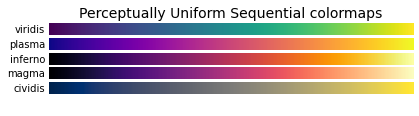

In [41]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

plot_color_gradients('Perceptually Uniform Sequential',
                 ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

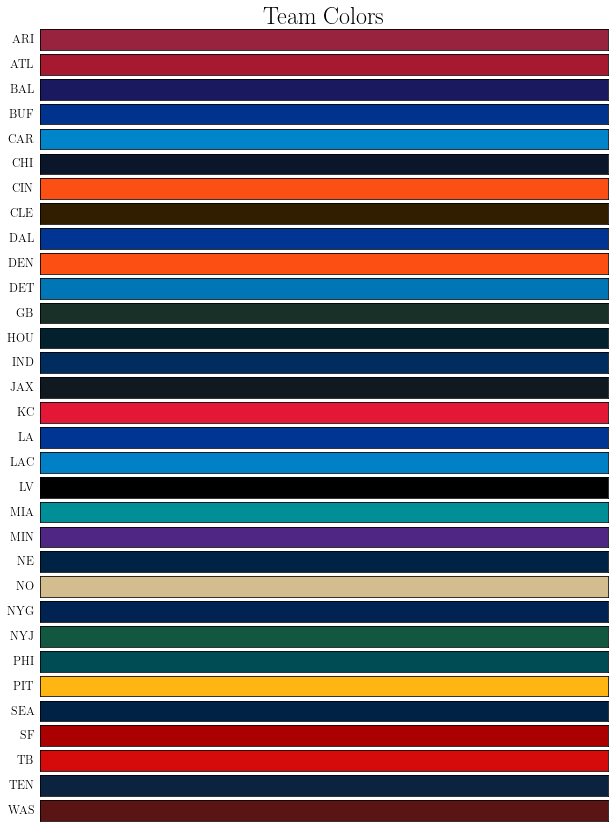

In [66]:
nrows = len(data.keys())
figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.15) * .3 #0.22

fig, axs = plt.subplots(nrows=nrows, figsize=(10, figh))
fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
axs[0].set_title('Team Colors', fontsize=24)

for ax, team in zip(axs, data.keys()):
    color = data[team][0:3] / 255
    ax.axhline(0, color=color, lw=20)
    ax.set_facecolor(color)
    ax.text(-0.01, 0.5, team, va='center', ha='right', fontsize=12,
            transform=ax.transAxes)

    for ax in axs:
        ax.tick_params(axis='both', which='both', bottom=False, top=False,
                      left=False, right=False, labelbottom=False, labeltop=False,
                      labelleft=False, labelright=False)
